<a href="https://colab.research.google.com/github/HishamAhmed2/Neural-Data-Analysis/blob/main/Spikes_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data**: Kohn, A., Smith, M.A. (2016) Utah array extracellular recordings of spontaneous and visually evoked activity from anesthetized macaque primary visual cortex (V1). CRCNS.org http://dx.doi.org/10.6080/K0NC5Z4X

**Publication**: Smith, Matthew A., and Adam Kohn. "Spatial and temporal scales of neuronal correlation in primary visual cortex." Journal of Neuroscience 28.48 (2008): 12591-12603.

**Import and convert data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# load the data
import scipy.io
mat = scipy.io.loadmat('/content/gdrive/MyDrive/Neural Data Analysis/data_monkey1_gratings.mat')

In [ ]:
import numpy as np
data = mat['data']
events= data['EVENTS'][0][0]
[nNeurons, nGratings, nTrials] = events.shape
totalSpikeCount= np.zeros(shape=[nNeurons, nGratings, nTrials]) #extract sizes of the data matrix
for neuroni in range(nNeurons): #loop through all elements of the data matrix and count the number of spikes in each cell
  for grati in range(nGratings):
    for triali in range(nTrials):
      totalSpikeCount[neuroni, grati, triali]= len(events[neuroni, grati, triali])
print(totalSpikeCount[0:3,3:6,2])


[[ 1.  0.  0.]
 [29. 18. 11.]
 [ 1.  0.  0.]]


**Spike counts histograms**

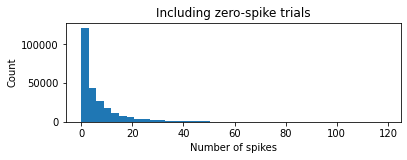

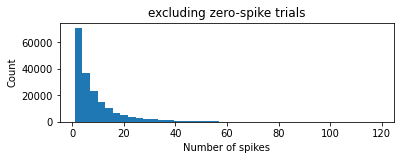

In [ ]:
import matplotlib.pyplot as plt
totalspikecount_reshaped= totalSpikeCount.flatten()
plt.subplot(211)
plt.hist(totalspikecount_reshaped, bins=40)
plt.xlabel('Number of spikes')
plt.ylabel('Count')
plt.title('Including zero-spike trials')
plt.show()
plt.subplot(212)
plt.hist(totalspikecount_reshaped[totalspikecount_reshaped!=0],bins=40)
plt.xlabel('Number of spikes')
plt.ylabel('Count')
plt.title('excluding zero-spike trials')
plt.show()

**Tuning curves**

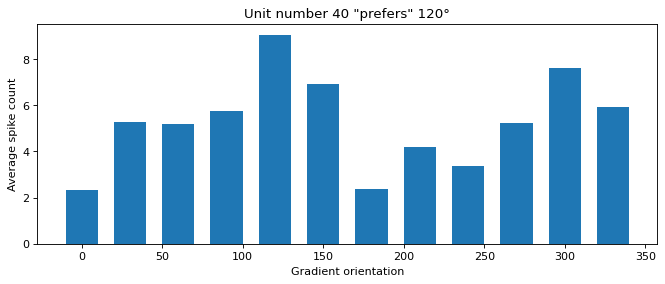

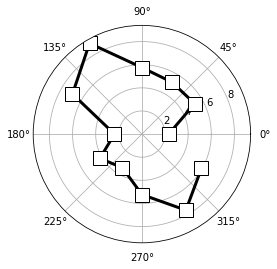

In [ ]:
from random import randint
import math
from matplotlib.pyplot import figure
figure(figsize=(10,8), dpi=80)
#pick a unit and compute its tuning curve
randomunit = randint(1, nNeurons) 
averageSpikes = np.mean(totalSpikeCount[randomunit, : , :], axis=1) 
maxval, maxresp = averageSpikes.max(axis=0), averageSpikes.argmax(axis=0)
gradientOrient = np.arange(0,360,30)
# bar plot
plt.subplot(211)
plt.bar(gradientOrient,averageSpikes, width=20)
plt.xlabel('Gradient orientation')
plt.ylabel('Average spike count')
plt.title('Unit number ' + str(randomunit+1) + ' "prefers" '+ str(gradientOrient[maxresp])+ u'\N{DEGREE SIGN}')
plt.show()
# polar plot
plt.polar(np.deg2rad(gradientOrient), averageSpikes, 'ks-', linewidth= 3, markersize=14, markerfacecolor='w')
plt.show()



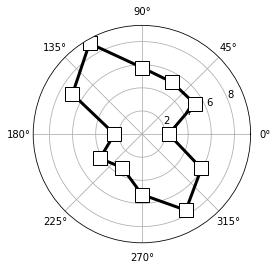

In [ ]:
#link last point to first point in polar plot
plt.polar(np.deg2rad(np.append(gradientOrient, gradientOrient[0])), np.append(averageSpikes,averageSpikes[0]) , 'ks-', linewidth= 3, markersize=14, markerfacecolor='w')
plt.show()

**Spatial map of spike counts**


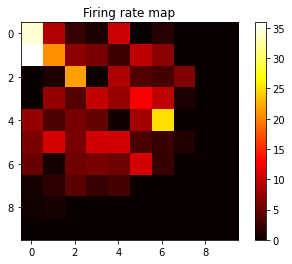

In [ ]:
APsPerCell = np.mean(np.mean(totalSpikeCount, axis=2), axis=1) #map the average number of spikes
channels = data['CHANNELS'][0][0] 
uniquechans = np.unique (channels[:, 0]) #list the channels with units
spikesMap = np.zeros(data['MAP'][0][0].shape)

for chani in uniquechans:
  whichunits = (channels[:, 0] == chani)
  row, col = np.where(data['MAP'][0][0] == chani) #map coordinate for this channel
  spikesMap[row, col] = np.mean(APsPerCell[whichunits]) #average number of spikes for all units on this channel

plt.imshow(spikesMap, 'hot')
plt.colorbar()
plt.title('Firing rate map')
plt.show()

**Spatial map of tuning**

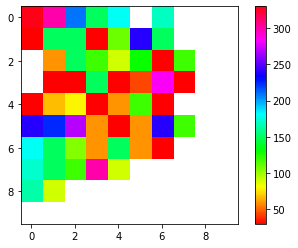

In [ ]:
averageSpikes = np.mean(totalSpikeCount, axis=2) #the average spike count over all trials per orientation
maxval, maxresp = averageSpikes.max(axis=1), averageSpikes.argmax(axis=1) #maximum response and convert to degrees
maxresp= gradientOrient[maxresp]
orientationMap = np.full(data['MAP'][0][0].shape, np.nan)
for chani in uniquechans:
  whichunits = (channels[:, 0] == chani) #all units on this electrode
  row, col = np.where(data['MAP'][0][0] == chani) #coordinate for this channel
  orientationMap[row, col] = np.mean(maxresp[whichunits]) #average number of spikes for all units on this channel

plt.imshow(orientationMap, 'hsv')
plt.title('Orientation map')
plt.colorbar()
plt.show()